In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

We will be tackling ODEs in this notebook. In physics we commonly encounter the following DEs.

- Newtonian Mechanics
- Schrodinger Equation (Qauntum Mechanics)
- TOV Equation (Stellar structure)

We will be solving a single differential equation for a single function $y(x)$, where $x$ is the independent variable and $y$ is the dependent variable. The first class of equation we will tackle is the **initial-value problem (IVP)**:
\
\
    $$\frac{dy}{dx} = f(x, y(x)),\qquad y(a) = c$$
    
\
\
$f(x,y)$ is a known function (in general nonlinear). What we wish to solve is $y$. It is called an initial value problem because $y$ is known at a certain point.

In physics we typically see second-order ODEs of the form:
\
\
    $$\frac{d^2y}{dx^2} = f(x,y,y'),\qquad y(a)=c,\qquad y'(a) = d$$
\
\
Another class of differential equation problem is the **boundary-value problem (BVP)**:
\
\
    $$\frac{d^2y}{dx^2} = f(x,y,y'),\qquad y(a)=c,\qquad y(b) = d$$
\
\
$y(a)=c$ and $y(b) = d$ are called boundary conditions. This is typically harder than IVPs because BVPs can have multiple solutions. An even harder problem arises when $f$ is also dependent on a parameter $s$; this is an eigenvalue problem (EVP):
\
\
    $$\frac{d^2y}{dx^2} = f(x,y,y'; s),\qquad y(a)=c,\qquad y(b) = d$$
\
\
We need to find the appropriate values of $s$. This refers to a family of equations (and correspondingly more than one solutions).

# Initial-Value Problems

We shall employ discretization where we compute $y(x)$ at a set of $n$ grid points $x_j$ from $a$ to $b$:
\
\
    $$x_j = a + j h$$
\
\
where $j = 0,1,2,\ldots, n-1$. The step size $h$ is given by
\
\
    $$h = \frac{b-a}{n-1}$$
\
\
We usually stick to a fixed $h$.

## Euler's Method

### Forward Euler

Going back to forward differences:
\
\
    $$y'(x_j) = \frac{y(x_{j+1}) - y(x_j)}{h}$$
\
\
But we know that $y'(x_j) = f(x_j, y(x_j))$. Equating: 
\
\
    $$y(x_{j+1}) = y(x_j) + hf(x_j, y(x_j))$$

# Implementation
Remember, we want to solve for:
$$\frac{dy}{dt}=f(y,t)$$

In [2]:
def odeEuler(f,y0,t):
    '''Approximate the solution of y'=f(y,t) by Euler's method.

    Parameters
    ----------
    f : function
        Right-hand side of the differential equation y'=f(t,y), y(t_0)=y_0
    y0 : number
        Initial value y(t0)=y0 wher t0 is the entry at index 0 in the array t
    t : array
        1D NumPy array of t values where we approximate y values. Time step
        at each iteration is given by t[n+1] - t[n].

    Returns
    -------
    y : 1D NumPy array
        Approximation y[n] of the solution y(t_n) computed by Euler's method.
    '''
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
        #print(y[n+1])
    return y

### Example

Solving 
\
\
$$y'(t) = y,\qquad y(0)=1 $$

<IPython.core.display.Javascript object>


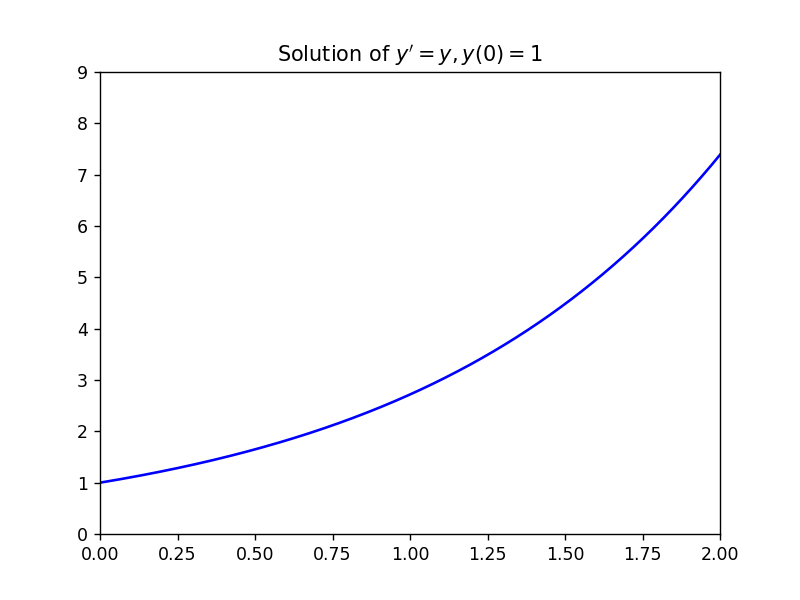

Text(0.5, 1.0, "Solution of $y'=y , y(0)=1$")

In [3]:
t = np.linspace(0,2,10000)
y0 = 1
f = lambda y,t: y
y = odeEuler(f,y0,t)

plt.figure()
plt.plot(t,y,'b')
plt.axis([0,2,0,9])
plt.title("Solution of $y'=y , y(0)=1$")

### Example

Solving 
\
\
$$y'(t) = -y^3 + \sin(t),\qquad y(0)=0 $$

<IPython.core.display.Javascript object>


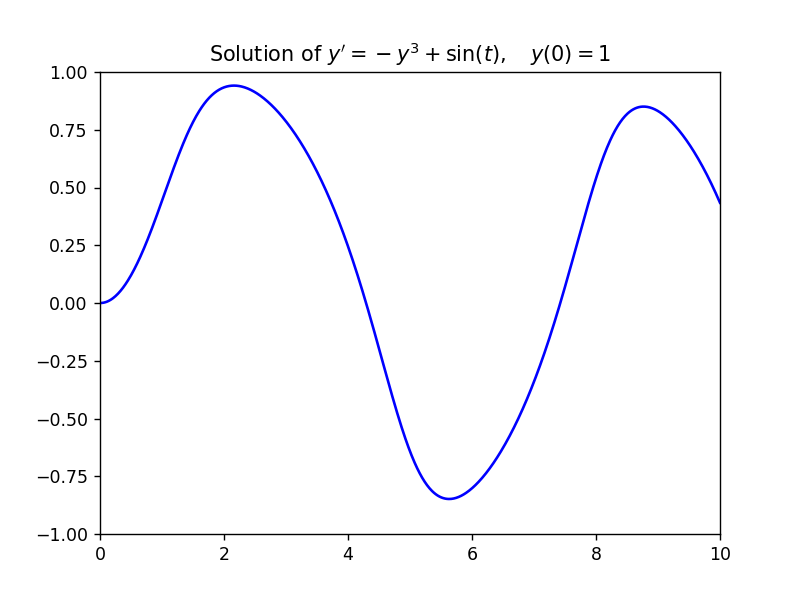

Text(0.5, 1.0, "Solution of $y'=-y^3 + \\sin(t) ,\\quad y(0)=1$")

In [4]:
t = np.linspace(0,10,1000)
y0 = 0
f = lambda y,t: -y**3 + np.sin(t)
y = odeEuler(f,y0,t)

plt.figure()
plt.plot(t,y,'b')
plt.axis([0,10,-1,1])
plt.title("Solution of $y'=-y^3 + \sin(t) ,\quad y(0)=1$")

### Example

Solving 
\
\
$$y'(t) = y^2,\qquad y(0)=-1$$

<IPython.core.display.Javascript object>


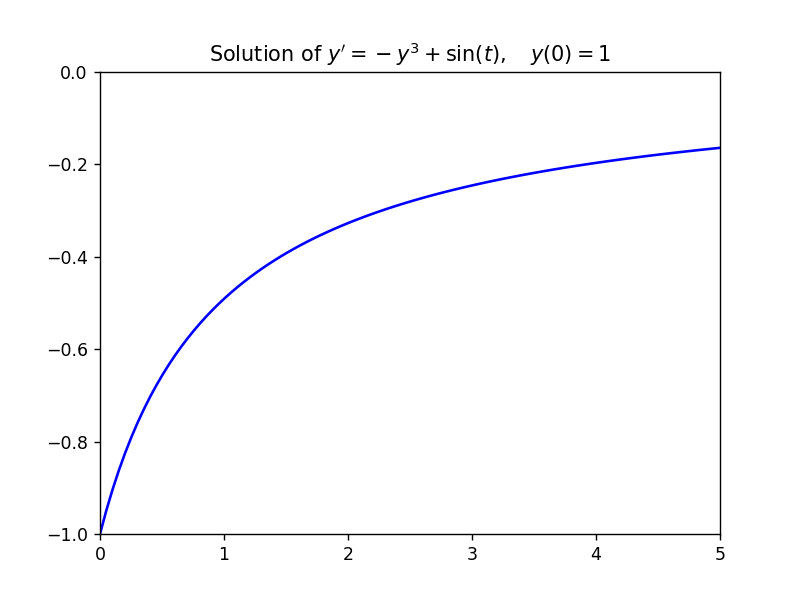

Text(0.5, 1.0, "Solution of $y'=-y^3 + \\sin(t) ,\\quad y(0)=1$")

In [5]:
t = np.linspace(0,5,100)
y0 = -1
f = lambda y,t: y**2
y = odeEuler(f,y0,t)

plt.figure()
plt.plot(t,y,'b')
plt.axis([0,5,-1,0])
plt.title("Solution of $y'=-y^3 + \sin(t) ,\quad y(0)=1$")